In [19]:
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf
from skimage.color import rgb2lab
from skimage.transform import resize
from collections import namedtuple
from tqdm import tqdm
import numpy as np
np.random.seed(101)
%matplotlib inline

In [20]:
Dataset = namedtuple('Dataset', ['X', 'y'])
IsSavePath = True
FOLDER_LABELS = 5
N_LABELS = 24
RESIZED_IMAGE = (32, 32)

In [3]:
user_folders = 'ABCDE'
letters = 'ABCDEFGHIKLMNOPQRSTUVWXY' #J & Z not included
labels = []

def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

def read_dataset(rootpath, n_labels, folder_labels, resize_to):
    image_hand = []
    for i in range(folder_labels):
        for j in range(n_labels):
            full_path = rootpath + '/' + user_folders[i] + '/' + letters[j].lower() + '/'
            print(full_path)
            for img_name in tqdm(glob.glob(full_path + "color*.png")):
                img = cv2.imread(img_name,cv2.IMREAD_COLOR)
                img = rgb2lab(img / 255.0)[:,:,0]
                img = resize(img, resize_to, mode='reflect')
                label = np.zeros((n_labels, ), dtype=np.float32)
                label[j] = 1.0
                image_hand.append(img.astype(np.float32))
                labels.append(label)
    return Dataset(X = to_tf_format(image_hand).astype(np.float32),
                 y = np.matrix(labels).astype(np.float32))

dataset = read_dataset('/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5', N_LABELS, FOLDER_LABELS, RESIZED_IMAGE)
print(dataset.X.shape)
print(dataset.y.shape)

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/a/


  3%|▎         | 15/515 [00:00<00:03, 146.57it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/b/


  2%|▏         | 12/556 [00:00<00:04, 118.46it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/c/


  3%|▎         | 14/535 [00:00<00:03, 135.12it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/d/


  2%|▏         | 13/523 [00:00<00:04, 125.81it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/e/


  3%|▎         | 13/518 [00:00<00:04, 126.05it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/f/


  2%|▏         | 11/527 [00:00<00:04, 103.88it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/g/


  2%|▏         | 10/522 [00:00<00:05, 97.99it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/h/


  2%|▏         | 11/514 [00:00<00:04, 106.69it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/i/


  0%|          | 0/517 [00:00<?, ?it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/k/


  2%|▏         | 9/515 [00:00<00:05, 85.78it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/l/


  3%|▎         | 15/526 [00:00<00:03, 147.86it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/m/


  2%|▏         | 13/529 [00:00<00:04, 122.81it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/n/


  2%|▏         | 12/511 [00:00<00:04, 117.82it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/o/


  2%|▏         | 9/571 [00:00<00:06, 85.39it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/p/


  3%|▎         | 13/515 [00:00<00:04, 124.66it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/q/


  3%|▎         | 16/527 [00:00<00:03, 155.28it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/r/


  3%|▎         | 16/470 [00:00<00:02, 153.53it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/s/


  2%|▏         | 13/523 [00:00<00:04, 123.02it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/t/


  3%|▎         | 17/523 [00:00<00:03, 167.83it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/u/


  3%|▎         | 15/506 [00:00<00:03, 142.86it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/v/


  3%|▎         | 16/524 [00:00<00:03, 157.85it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/w/


  3%|▎         | 15/521 [00:00<00:03, 140.81it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/x/


  1%|          | 6/532 [00:00<00:08, 59.78it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/A/y/


  2%|▏         | 10/535 [00:00<00:05, 91.85it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/a/


  2%|▏         | 14/576 [00:00<00:04, 139.15it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/b/


  0%|          | 0/548 [00:00<?, ?it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/c/


  2%|▏         | 12/551 [00:00<00:04, 116.50it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/d/


  2%|▏         | 12/564 [00:00<00:04, 118.18it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/e/


  2%|▏         | 12/529 [00:00<00:04, 113.93it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/f/


  2%|▏         | 10/543 [00:00<00:05, 98.88it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/g/


  2%|▏         | 11/544 [00:00<00:04, 108.58it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/h/


  0%|          | 0/542 [00:00<?, ?it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/i/


  1%|          | 9/776 [00:00<00:08, 88.33it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/k/


  1%|          | 7/576 [00:00<00:08, 66.15it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/l/


  3%|▎         | 17/581 [00:00<00:03, 159.02it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/m/


  2%|▏         | 12/543 [00:00<00:04, 119.51it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/n/


  2%|▏         | 12/528 [00:00<00:04, 116.29it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/o/


  2%|▏         | 11/641 [00:00<00:05, 106.50it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/p/


  1%|▏         | 8/539 [00:00<00:06, 79.52it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/q/


  2%|▏         | 13/549 [00:00<00:04, 125.40it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/r/


  1%|▏         | 11/748 [00:00<00:06, 108.84it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/s/


  3%|▎         | 13/513 [00:00<00:04, 122.03it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/t/


  3%|▎         | 14/541 [00:00<00:03, 136.23it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/u/


  2%|▏         | 12/627 [00:00<00:05, 118.39it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/v/


  2%|▏         | 11/647 [00:00<00:05, 106.78it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/w/


  2%|▏         | 13/621 [00:00<00:04, 128.05it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/x/


  2%|▏         | 9/536 [00:00<00:06, 81.11it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/B/y/


  2%|▏         | 9/523 [00:00<00:05, 88.65it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/a/


  2%|▏         | 13/532 [00:00<00:04, 111.42it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/b/


  1%|          | 9/742 [00:00<00:09, 80.32it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/c/


  2%|▏         | 11/525 [00:00<00:04, 107.24it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/d/


  2%|▏         | 12/528 [00:00<00:04, 111.59it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/e/


  2%|▏         | 12/517 [00:00<00:04, 115.85it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/f/


  2%|▏         | 10/531 [00:00<00:05, 92.78it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/g/


  2%|▏         | 9/535 [00:00<00:06, 83.62it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/h/


  2%|▏         | 11/529 [00:00<00:04, 103.97it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/i/


  2%|▏         | 9/538 [00:00<00:06, 84.77it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/k/


  1%|▏         | 8/585 [00:00<00:07, 74.74it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/l/


  3%|▎         | 16/537 [00:00<00:03, 159.94it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/m/


  2%|▏         | 12/563 [00:00<00:04, 119.22it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/n/


  2%|▏         | 11/547 [00:00<00:05, 97.04it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/o/


  3%|▎         | 16/533 [00:00<00:03, 155.88it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/p/


  2%|▏         | 10/540 [00:00<00:05, 92.66it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/q/


  2%|▏         | 10/529 [00:00<00:05, 92.88it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/r/


  3%|▎         | 14/506 [00:00<00:03, 139.11it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/s/


  0%|          | 0/528 [00:00<?, ?it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/t/


  2%|▏         | 12/529 [00:00<00:04, 117.30it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/u/


  2%|▏         | 10/535 [00:00<00:05, 95.57it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/v/


  2%|▏         | 16/889 [00:00<00:05, 155.66it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/w/


  2%|▏         | 12/530 [00:00<00:04, 113.89it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/x/


  2%|▏         | 9/542 [00:00<00:06, 82.27it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/C/y/


  2%|▏         | 13/546 [00:00<00:04, 124.34it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/a/


  2%|▏         | 12/571 [00:00<00:05, 109.18it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/b/


  3%|▎         | 14/530 [00:00<00:03, 135.99it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/c/


  2%|▏         | 11/525 [00:00<00:04, 105.47it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/d/


  2%|▏         | 12/527 [00:00<00:04, 112.54it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/e/


  2%|▏         | 8/524 [00:00<00:06, 79.45it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/f/


  2%|▏         | 9/541 [00:00<00:06, 78.99it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/g/


  1%|          | 6/561 [00:00<00:09, 55.73it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/h/


  2%|▏         | 9/521 [00:00<00:05, 89.39it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/i/


  2%|▏         | 9/539 [00:00<00:06, 81.61it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/k/


  1%|▏         | 8/564 [00:00<00:07, 75.99it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/l/


  2%|▏         | 13/541 [00:00<00:04, 123.74it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/m/


  2%|▏         | 13/529 [00:00<00:04, 120.16it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/n/


  2%|▏         | 12/538 [00:00<00:04, 119.23it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/o/


  3%|▎         | 18/531 [00:00<00:02, 177.63it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/p/


  3%|▎         | 15/549 [00:00<00:03, 148.68it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/q/


  2%|▏         | 14/773 [00:00<00:05, 132.30it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/r/


  3%|▎         | 14/534 [00:00<00:03, 139.48it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/s/


  2%|▏         | 12/529 [00:00<00:04, 116.68it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/t/


  2%|▏         | 12/531 [00:00<00:04, 111.04it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/u/


  2%|▏         | 11/543 [00:00<00:04, 109.48it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/v/


  2%|▏         | 9/535 [00:00<00:06, 76.67it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/w/


  3%|▎         | 15/537 [00:00<00:03, 145.27it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/x/


  0%|          | 0/535 [00:00<?, ?it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/D/y/


  3%|▎         | 14/545 [00:00<00:03, 135.11it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/a/


  3%|▎         | 16/534 [00:00<00:03, 153.65it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/b/


  3%|▎         | 16/540 [00:00<00:03, 152.55it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/c/


  2%|▏         | 12/544 [00:00<00:04, 115.70it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/d/


  2%|▏         | 13/539 [00:00<00:04, 124.81it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/e/


  2%|▏         | 12/527 [00:00<00:04, 112.75it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/f/


  2%|▏         | 9/537 [00:00<00:06, 84.65it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/g/


  1%|▏         | 7/534 [00:00<00:08, 62.99it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/h/


  2%|▏         | 11/525 [00:00<00:04, 104.49it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/i/


  2%|▏         | 13/569 [00:00<00:04, 129.10it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/k/


  2%|▏         | 8/514 [00:00<00:06, 78.09it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/l/


  2%|▏         | 13/525 [00:00<00:04, 125.20it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/m/


  2%|▏         | 13/530 [00:00<00:04, 126.46it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/n/


  2%|▏         | 8/532 [00:00<00:06, 77.34it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/o/


  2%|▏         | 13/527 [00:00<00:04, 124.80it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/p/


  2%|▏         | 10/529 [00:00<00:05, 94.70it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/q/


  2%|▏         | 14/562 [00:00<00:04, 132.05it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/r/


  3%|▎         | 14/526 [00:00<00:03, 134.30it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/s/


  2%|▏         | 12/531 [00:00<00:04, 117.62it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/t/


  2%|▏         | 12/529 [00:00<00:04, 117.55it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/u/


  2%|▏         | 10/527 [00:00<00:05, 96.64it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/v/


  3%|▎         | 13/513 [00:00<00:04, 117.06it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/w/


  2%|▏         | 13/522 [00:00<00:04, 122.92it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/x/


  2%|▏         | 8/521 [00:00<00:07, 70.39it/s]

/Volumes/Shared/MAC/UCDenver_CSE/MachineLearning/Assignment5/dataset5/E/y/


100%|██████████| 521/521 [00:07<00:00, 72.38it/s]


(65774, 32, 32, 1)
(65774, 24)


In [4]:
dataset[0]

array([[[[98.104065  ],
         [98.098625  ],
         [98.098625  ],
         ...,
         [12.979625  ],
         [12.529243  ],
         [11.892953  ]],

        [[98.499245  ],
         [98.15668   ],
         [98.098625  ],
         ...,
         [12.987052  ],
         [10.284325  ],
         [10.616434  ]],

        [[68.483696  ],
         [92.4381    ],
         [98.481346  ],
         ...,
         [13.38737   ],
         [12.460926  ],
         [10.909865  ]],

        ...,

        [[50.556686  ],
         [46.61576   ],
         [80.89136   ],
         ...,
         [25.416695  ],
         [20.714518  ],
         [12.260627  ]],

        [[43.203632  ],
         [78.820206  ],
         [81.55344   ],
         ...,
         [25.52397   ],
         [27.593136  ],
         [17.15525   ]],

        [[75.28181   ],
         [86.70094   ],
         [85.75015   ],
         ...,
         [26.23138   ],
         [28.339382  ],
         [38.773453  ]]],


       [[[23.724974  ],


In [5]:
#Save the train dataset
savedata = np.array(dataset[0])
np.save('train.npy', savedata)
np.save('train_labels.npy', labels)
print(savedata.shape)

(65774, 32, 32, 1)


In [21]:
#If you have already created the dataset:
train_data_X = np.load('train.npy')
labels_y = np.load('train_labels.npy')

In [22]:
train_data_X.shape

(65774, 32, 32, 1)

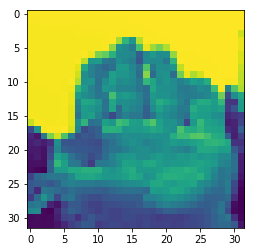

In [23]:
plt.imshow(train_data_X[530, :, :, :].reshape(RESIZED_IMAGE)) #sample

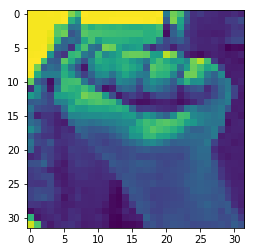

In [24]:
plt.imshow(train_data_X[100, :, :, :].reshape(RESIZED_IMAGE)) #sample

In [25]:
from sklearn.model_selection import train_test_split
idx_train, idx_test = train_test_split(range(train_data_X.shape[0]), test_size=0.25, random_state=101)
X_train = train_data_X[idx_train, :, :, :]
X_test = train_data_X[idx_test, :, :, :]
y_train = labels_y[idx_train, :]
y_test = labels_y[idx_test, :]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(49330, 32, 32, 1)
(49330, 24)
(16444, 32, 32, 1)
(16444, 24)


In [26]:
def minibatcher(X, y, batch_size, shuffle):
    assert X.shape[0] == y.shape[0]
    n_samples = X.shape[0]
  
    if shuffle:
        idx = np.random.permutation(n_samples)
    else:
        idx = list(range(n_samples))
  
    for k in range(int(np.ceil(n_samples/batch_size))):
        from_idx = k*batch_size
        to_idx = (k+1)*batch_size
        yield X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :]

In [27]:
def fc_no_activation_layer(in_tensors, n_units):
    w = tf.get_variable('fc_W', 
    [in_tensors.get_shape()[1], n_units],
    tf.float32,
    tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('fc_B',
    [n_units, ],
    tf.float32,
    tf.constant_initializer(0.0))
    return tf.matmul(in_tensors, w) + b

def fc_layer(in_tensors, n_units):
    return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors, n_units))

def maxpool_layer(in_tensors, sampling):
    return tf.nn.max_pool(in_tensors, [1, sampling, sampling, 1], [1, sampling, sampling, 1], 'SAME')
  
def conv_layer(in_tensors, kernel_size, n_units):
    w = tf.get_variable('conv_W', 
    [kernel_size, kernel_size, in_tensors.get_shape()[3], n_units],
    tf.float32,
    tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('conv_B',
    [n_units, ],
    tf.float32,
    tf.constant_initializer(0.0))
    return tf.nn.leaky_relu(tf.nn.conv2d(in_tensors, w, [1, 2, 2, 1], 'SAME') + b)

def dropout(in_tensors, keep_proba, is_training):
    return tf.cond(is_training, lambda: tf.nn.dropout(in_tensors, keep_proba), lambda: in_tensors)

  
def model(in_tensors, is_training):
    # First layer: 5x5 2d-conv, 32 filters, 2x maxpool, 20% drouput
    with tf.variable_scope('l1'):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
        l1_out = dropout(l1, 0.8, is_training)
    # Second layer: 5x5 2d-conv, 64 filters, 2x maxpool, 20% drouput
    with tf.variable_scope('l2'):
        l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
        l2_out = dropout(l2, 0.8, is_training)
    
    with tf.variable_scope('flatten'):
        l2_out_flat = tf.layers.flatten(l2_out)
  
    # Fully collected layer, 1024 neurons, 40% dropout 
    with tf.variable_scope('l3'):
        l3 = fc_layer(l2_out_flat, 1024)
        l3_out = dropout(l3, 0.6, is_training)
  
    # Output
    with tf.variable_scope('out'):
        out_tensors = fc_no_activation_layer(l3_out, N_LABELS)
  
    return out_tensors


  0%|          | 0/10 [00:00<?, ?it/s]

('Epoch=', 0)



 10%|█         | 1/10 [00:17<02:35, 17.28s/it]

(' train_loss_score=', 1.979242)
('Epoch=', 1)



 20%|██        | 2/10 [00:34<02:18, 17.37s/it]

(' train_loss_score=', 0.78717756)
('Epoch=', 2)



 30%|███       | 3/10 [00:51<01:59, 17.10s/it]

(' train_loss_score=', 0.5351909)
('Epoch=', 3)



 40%|████      | 4/10 [01:07<01:41, 16.91s/it]

(' train_loss_score=', 0.4180201)
('Epoch=', 4)



 50%|█████     | 5/10 [01:23<01:23, 16.79s/it]

(' train_loss_score=', 0.3529819)
('Epoch=', 5)



 60%|██████    | 6/10 [01:39<01:06, 16.64s/it]

(' train_loss_score=', 0.29973)
('Epoch=', 6)



 70%|███████   | 7/10 [01:56<00:50, 16.69s/it]

(' train_loss_score=', 0.27225918)
('Epoch=', 7)



 80%|████████  | 8/10 [02:13<00:33, 16.66s/it]

(' train_loss_score=', 0.2450213)
('Epoch=', 8)



 90%|█████████ | 9/10 [02:29<00:16, 16.60s/it]

(' train_loss_score=', 0.22749458)
('Epoch=', 9)



100%|██████████| 10/10 [02:45<00:00, 16.59s/it]


(' train_loss_score=', 0.21686988)
Model saved in path: /Volumes/Shared/model.ckpt
TEST SET PERFORMANCE
(' test_loss_score=', 0.10054103)
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       641
          1       0.99      1.00      0.99       729
          2       0.99      0.98      0.98       743
          3       1.00      0.94      0.97       640
          4       0.99      0.97      0.98       666
          5       0.99      0.98      0.98       625
          6       0.97      0.95      0.96       701
          7       0.94      0.98      0.96       680
          8       0.98      0.98      0.98       652
          9       0.98      0.97      0.98       725
         10       1.00      0.98      0.99       693
         11       0.95      0.98      0.96       693
         12       0.97      0.94      0.95       665
         13       0.99      0.93      0.96       669
         14       0.94      0.97      0.95       697
         15  

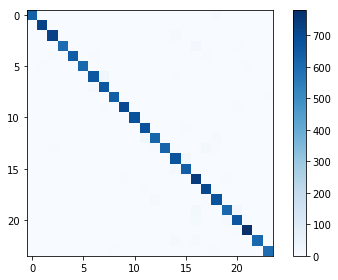

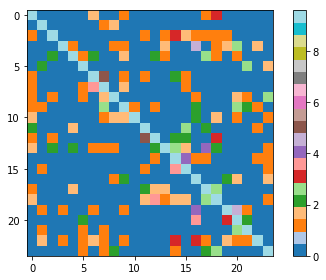

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.python.framework import ops
trainloss_list=[]

def train_model(X_train, y_train, X_test, y_test, learning_rate, max_epochs, batch_size):
    in_X_tensors_batch = tf.placeholder(tf.float32, shape = (None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1),name="in_X_tensors_batch")
    in_y_tensors_batch = tf.placeholder(tf.float32, shape = (None, N_LABELS),name= "in_y_tensors_batch")
    is_training = tf.placeholder(tf.bool, name="is_training")
    
    logits = model(in_X_tensors_batch, is_training)
    out_y_pred = tf.nn.softmax(logits,name="out_y_pred")
    loss_score = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=in_y_tensors_batch, name="loss_score")
    loss = tf.reduce_mean(loss_score, name="loss")
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
    # Add ops to save and restore all the variables.
    
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        for epoch in tqdm(range(max_epochs)):
            print("Epoch=", epoch)
            tf_score = []
            for mb in minibatcher(X_train, y_train, batch_size, shuffle = True):
                tf_output = session.run([optimizer, loss], 
                                        feed_dict = {in_X_tensors_batch : mb[0],
                                                     in_y_tensors_batch : mb[1],
                                                     is_training : True})
                tf_score.append(tf_output[1])
            print(" train_loss_score=", np.mean(tf_score))
            trainloss_list.append(np.mean(tf_score)) #trainloss list
        saver = tf.train.Saver()    
        if(IsSavePath):    
            # Save the variables to disk.
            save_path = saver.save(session, r"/Volumes/Shared/model.ckpt")
            print("Model saved in path: %s" % save_path)
            
        # Restore variables from disk.
        #saver.restore(session, r"/Volumes/Shared/model.ckpt")
        #print("Model restored.")
        tf.summary.FileWriter(r'/Volumes/Shared/logtensor.log', session.graph)    
        # after the training is done, time to test it on the test set
        print("TEST SET PERFORMANCE")
        y_test_pred, test_loss  = session.run([out_y_pred, loss], 
                                              feed_dict = {in_X_tensors_batch : X_test, 
                                                           in_y_tensors_batch : y_test,
                                                           is_training : False})
    
        print(" test_loss_score=", test_loss)
        y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
        y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
        print(classification_report(y_test_true_classified, y_test_pred_classified))
    
        cm = confusion_matrix(y_test_true_classified, y_test_pred_classified)
    
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        plt.tight_layout()
        plt.show()
    
        # And the log2 version, to enphasize the misclassifications
        plt.imshow(np.log2(cm + 1), interpolation='nearest', cmap=plt.get_cmap("tab20"))
        plt.colorbar()
        plt.tight_layout()
        plt.show()


ops.reset_default_graph()
train_model(X_train, y_train, X_test, y_test, 0.001, 10, 256)

In [18]:
trainloss_list

[2.0264242,
 0.8061841,
 0.53967327,
 0.42542136,
 0.35607377,
 0.30505303,
 0.2675248,
 0.25412017,
 0.22761321,
 0.21703732]

Text(0.5,0,'Epochs')

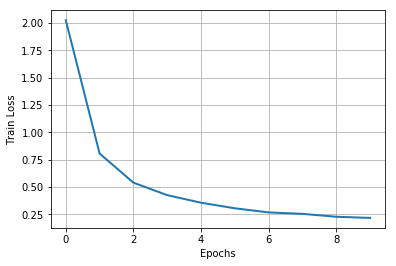

In [26]:
epochs=[0,1,2,3,4,5,6,7,8,9]
plt.plot(epochs,trainloss_list, linewidth=2.0)
plt.grid(True)
plt.ylabel('Train Loss')
plt.xlabel('Epochs')

In [29]:
#VIDEO PART NOT COMPLETED# DONOT RUN <b>

In [4]:
video_path= '/Volumes/Shared/MAC/UCDenver_CSE/HandSymbol.mov'

In [61]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('/Volumes/Shared/model.ckpt.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('/Volumes/Shared/'+'./'))

    print("Model restored.")
    video_capture = cv2.VideoCapture(video_path) 
    i = 0
    while True:  # fps._numFrames < 120
        frame = video_capture.read()[1] # get current frame
        frameId = video_capture.get(1) #current frame number
        if (0 == 0):  # not necessary
            i = i + 1
            cv2.imwrite(filename="/Volumes/Shared/FingerVideo/"+str(i)+"alpha.png", img=frame); # write frame image to file
            image_data = tf.gfile.FastGFile("/Volumes/Shared/FingerVideo/"+str(i)+"alpha.png", 'rb').read() # get this image file
            in_X_tensors_batch_New = sess.graph.get_tensor_by_name("in_X_tensors_batch:0")
            in_y_tensors_batch_New = sess.graph.get_tensor_by_name("in_y_tensors_batch:0")
            is_training_New = sess.graph.get_tensor_by_name("is_training:0")
    
            out_y_pred_New = sess.graph.get_tensor_by_name("out_y_pred:0")
            loss_score_New = sess.graph.get_tensor_by_name("loss_score:0")
            loss_New = sess.graph.get_tensor_by_name("loss:0")
            is_training_New=False
            y_test_pred_New, test_loss_New  = sess.run([out_y_pred, loss])
    
            print(" test_loss_score=", test_loss)
            y_test_pred_classified = np.argmax(y_test_pred_New, axis=1).astype(np.int32)
            #y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
            #print(classification_report(y_test_true_classified, y_test_pred_classified))
            
            
#             predictions = sess.run(softmax_tensor, \
#                      {'DecodeJpeg/contents:0': image_data}) # analyse the image
#             top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]
#             for node_id in top_k:
#                 human_string = label_lines[node_id]
#                 score = predictions[0][node_id]
#                 print('%s (score = %.5f)' % (human_string, score))
#             print ("\n\n")
#             cv2.imshow("image", frame)  # show frame in window
            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break

INFO:tensorflow:Restoring parameters from /Volumes/Shared/model.ckpt
Model restored.


InvalidArgumentError: You must feed a value for placeholder tensor 'in_y_tensors_batch' with dtype float and shape [?,24]
	 [[Node: in_y_tensors_batch = Placeholder[dtype=DT_FLOAT, shape=[?,24], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op u'in_y_tensors_batch', defined at:
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tornado/ioloop.py", line 1064, in start
    handler_func(fd_obj, events)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2824, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-9ab1b030bc37>", line 67, in <module>
    train_model(X_train, y_train, X_test, y_test, 0.001, 10, 256)
  File "<ipython-input-46-9ab1b030bc37>", line 7, in train_model
    in_y_tensors_batch = tf.placeholder(tf.float32, shape = (None, N_LABELS),name= "in_y_tensors_batch")
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4848, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/Users/mohammadtayyab/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'in_y_tensors_batch' with dtype float and shape [?,24]
	 [[Node: in_y_tensors_batch = Placeholder[dtype=DT_FLOAT, shape=[?,24], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [2]:
video_capture.release() 
cv2.destroyAllWindows()

In [ ]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = r"/Volumes/Shared/model.ckpt"

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

In [ ]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


# Loading label map
# Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


In [ ]:
cv2.imshow('object detection', cv2.resize(image_np, (800,600)))
      if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break